Generic imports

In [ ]:
import numpy as np
import pandas as pd
import time
import datetime
import asyncio

import seaborn as sns



Use the DHT SQL python API to connect to the local replica server.

Query server and get DHT data

In [ ]:
from include.DHT_MySQL_interface import DHTConnection, ObsDHT

raspi_connection_config = {
    "host": '192.168.1.109',
    "database": "pi_humidity",
    "user": "haydeni0",
    "password": "raspizeroWH_SQL",
    'raise_on_warnings': True
}

HaydensPC_connection_config = {
    "host": 'localhost',
    "database": "pi_humidity",
    "user": "haydeni0",
    "password": "OSzP34,@H0.I2m$sZpI<",
    'raise_on_warnings': True
}

TABLE_NAME_inside = "dht_inside"
TABLE_NAME_outside = "dht_outside"

pi_humidity_SQL = DHTConnection(HaydensPC_connection_config)


In [108]:
# What time interval to pull from the server
start_dtime = datetime.datetime(2021, 11, 1)
# end_dtime = datetime.datetime(2022, 1, 8)
end_dtime = datetime.datetime(2021, 12, 1)

dht_inside = pd.DataFrame(tuple(zip(*pi_humidity_SQL.getObservations(TABLE_NAME_inside, start_dtime, end_dtime))), columns=["dtime", "humidity_inside", "temperature_inside"])
dht_outside = pd.DataFrame(tuple(zip(*pi_humidity_SQL.getObservations(TABLE_NAME_outside, start_dtime, end_dtime))), columns=["dtime", "humidity_outside", "temperature_outside"])
# Merge (using primary key dtime) into a single dataframe
df = pd.merge(dht_inside, dht_outside)
# Set the dtime as the index
df.set_index(["dtime"], inplace=True)
# Resample the data to remove errors (with median) and reduce the number of datapoints
df = df.resample("10min").median()

In [109]:
df

,humidity_inside,temperature_inside,humidity_outside,temperature_outside
dtime,,,,
2021-11-01 00:00:00,82.5,20.7,59.2,20.1
2021-11-01 00:10:00,82.7,20.5,59.5,19.9
2021-11-01 00:20:00,83.1,20.4,59.8,19.8
2021-11-01 00:30:00,83.6,20.3,60.6,19.7
2021-11-01 00:40:00,84.0,20.2,61.1,19.6
...,...,...,...,...
2021-11-30 23:10:00,86.5,21.9,48.0,22.4
2021-11-30 23:20:00,86.4,21.8,49.1,21.9
2021-11-30 23:30:00,86.5,21.6,50.6,21.4


Plotting


<AxesSubplot:xlabel='dtime', ylabel='humidity_inside'>

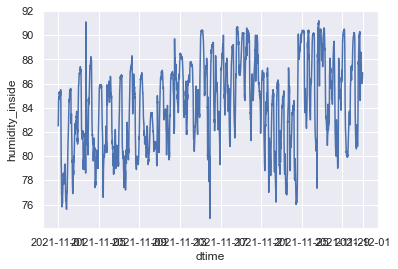

In [112]:
sns.set_theme(style="darkgrid")
sns.lineplot(x="dtime", y="humidity_inside", data=df)

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


In [86]:
df

,dtime,humidity_inside,temperature_inside,humidity_outside,temperature_outside
0,2021-11-01 00:00:12.700,82.3,20.7,59.0,20.1
1,2021-11-01 00:00:27.600,81.7,20.8,58.5,20.2
2,2021-11-01 00:00:37.400,82.8,20.7,59.0,20.1
3,2021-11-01 00:00:40.600,82.9,20.8,59.0,20.1
4,2021-11-01 00:00:43.600,82.3,20.8,59.1,20.2
...,...,...,...,...,...
603806,2021-11-30 23:59:33.900,87.6,21.2,52.9,20.6
603807,2021-11-30 23:59:37.100,87.3,21.2,52.9,20.6
603808,2021-11-30 23:59:40.200,86.9,21.2,52.9,20.6
603809,2021-11-30 23:59:52.500,86.9,21.2,52.9,20.6
